#Questão 9 - Questionário 6

Caique Honorio - 8910222 - Engenharia de Computação

Ivan Pinheiro - 9050552 - Bacharelado em Sistemas de Informação



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
import geopandas

In [87]:
df = pd.read_csv("amostra_banco_distrito.csv", sep=',', decimal=',')

df.head()

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente,Distrito
0,106,F,32,Autônomo,6162.0,-372.36,0.0,0.0,1736.56,1,IPIRANGA
1,310,M,34,Privada,3898.3,-45.74,0.0,0.0,3567.22,1,ITAQUERA
2,431,F,28,Privada,5517.0,-527.95,0.0,0.0,2722.83,1,PENHA
3,590,F,28,Pública,5546.2,907.92,0.0,0.0,114.49,0,VILA PRUDENTE
4,971,F,32,Pública,5276.0,1143.71,0.0,0.0,647.00,0,PENHA


In [20]:
df.shape

(500, 11)

In [37]:
df.describe()

,Cliente,Idade,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,50769.254000,32.118000,5680.676900,662.14398,1855.374460,1238.039780,1668.303501,0.298000
std,28628.982131,3.106667,1797.609835,467.30285,5239.894204,3623.469665,1458.218310,0.457838
min,106.000000,24.000000,3121.300000,-1149.61000,0.000000,0.000000,0.000000,0.000000
25%,24969.750000,30.000000,4357.600000,485.03000,0.000000,0.000000,243.750000,0.000000
50%,51873.500000,32.000000,5520.500000,779.40000,0.000000,0.000000,1521.815000,0.000000
75%,76409.500000,34.000000,6369.825000,979.47750,0.000000,0.000000,2769.352500,1.000000
max,99985.000000,47.000000,17139.000000,1838.56000,18452.970000,18363.060000,5906.760000,1.000000


In [36]:
df['Inadimplente'].value_counts()

0    351
1    149
Name: Inadimplente, dtype: int64

In [35]:
df['Empresa'].value_counts()

Privada     313
Pública     117
Autônomo     70
Name: Empresa, dtype: int64

In [34]:
df['Distrito'].value_counts()

ITAQUERA                     26
CAMPO LIMPO                  23
BUTANTA                      22
IPIRANGA                     21
SE                           21
M'BOI MIRIM                  21
PIRITUBA-JARAGUA             21
SAO MATEUS                   20
FREGUESIA-BRASILANDIA        20
ITAIM PAULISTA               20
PENHA                        20
CAPELA DO SOCORRO            19
VILA MARIANA                 19
CASA VERDE-CACHOEIRINHA      17
VILA MARIA-VILA GUILHERME    17
SAPOPEMBA                    16
SAO MIGUEL                   16
PARELHEIROS                  15
PINHEIROS                    13
MOOCA                        13
JACANA-TREMEMBE              13
LAPA                         13
CIDADE ADEMAR                12
ARICANDUVA-FORMOSA-CARRAO    12
SANTO AMARO                  11
SANTANA-TUCURUVI             11
VILA PRUDENTE                11
JABAQUARA                     9
ERMELINO MATARAZZO            9
CIDADE TIRADENTES             7
GUAIANASES                    6
PERUS   

###Primeiro vamos analisar o dendograma para todos os indíduos

In [42]:
df_new = df.drop(["Empresa","Sexo","Distrito"], axis=1)
df_new.head()

,Cliente,Idade,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
0,106,32,6162.0,-372.36,0.0,0.0,1736.56,1
1,310,34,3898.3,-45.74,0.0,0.0,3567.22,1
2,431,28,5517.0,-527.95,0.0,0.0,2722.83,1
3,590,28,5546.2,907.92,0.0,0.0,114.49,0
4,971,32,5276.0,1143.71,0.0,0.0,647.00,0


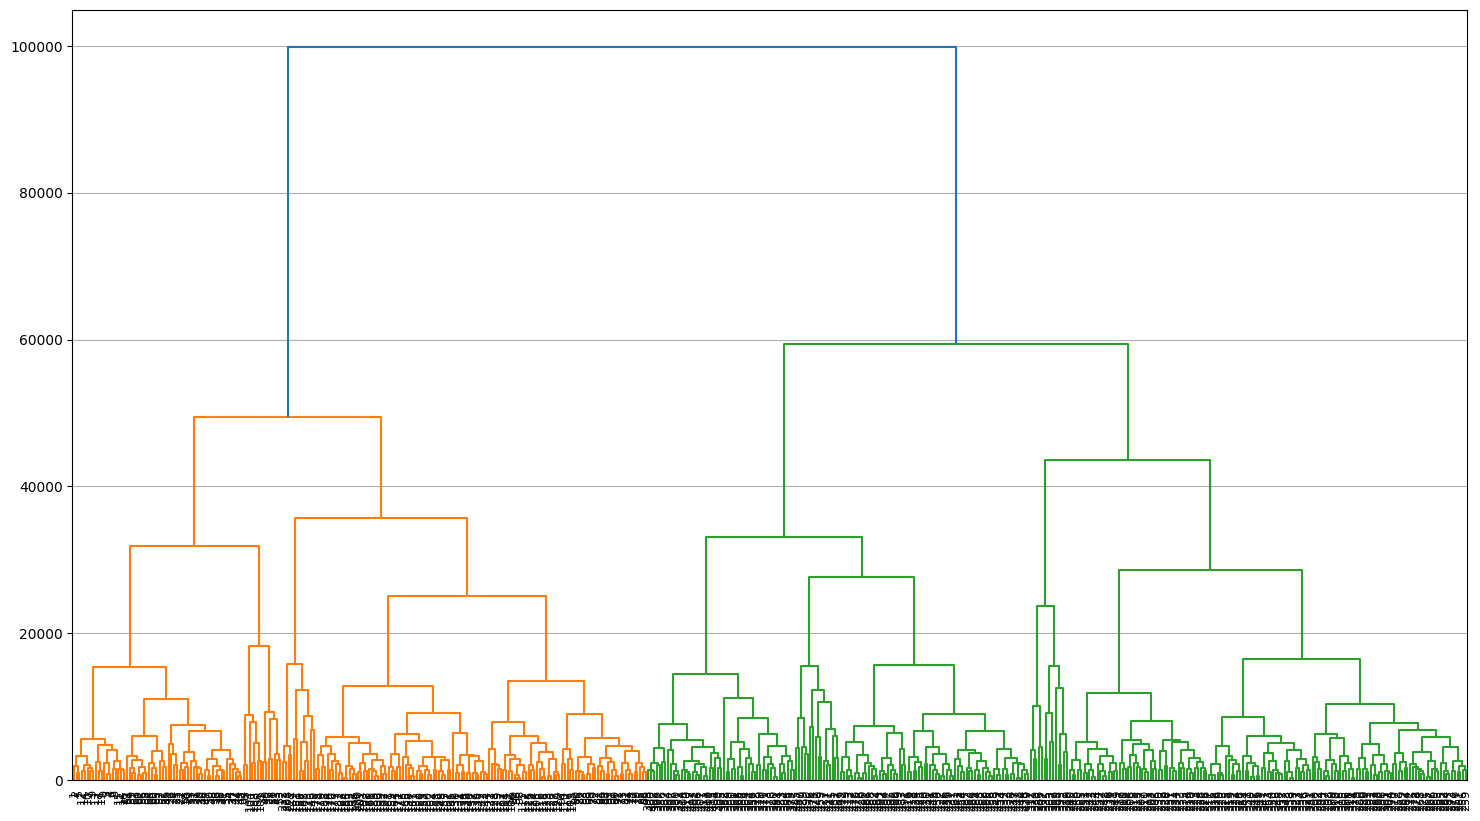

In [44]:
Z = hierarchy.linkage(df_new, 'complete')
plt.figure(figsize=(18, 10))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df.index), leaf_font_size=8)

Vendo o gráfico observamos que fica muito difícil analisar os agrupamentos a partir do individuos, de forma que o ideal é seperar por região e agrupalas usando o dendograma.

In [53]:
df.groupby(by='Distrito').mean()

<ipython-input-53-1276e6508b09>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Distrito').mean()


,Cliente,Idade,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
Distrito,,,,,,,,
ARICANDUVA-FORMOSA-CARRAO,73427.833333,31.416667,5477.666667,395.705000,0.000000,0.000000,1234.876667,0.416667
BUTANTA,61442.318182,31.590909,7053.636364,713.445909,797.132727,371.774545,2065.406818,0.227273
CAMPO LIMPO,41518.000000,32.130435,5462.652174,691.462609,0.000000,0.000000,2716.144348,0.304348
CAPELA DO SOCORRO,49592.368421,32.052632,3871.957895,432.477895,0.000000,0.000000,2180.389474,0.421053
CASA VERDE-CACHOEIRINHA,48460.882353,32.176471,6900.220588,730.812941,0.000000,0.000000,1960.548235,0.294118
CIDADE ADEMAR,45774.583333,33.333333,4628.200000,655.425000,0.000000,0.000000,2720.068333,0.416667
CIDADE TIRADENTES,54118.000000,31.571429,4413.942857,553.777143,0.000000,0.000000,2083.540000,0.285714
ERMELINO MATARAZZO,40033.111111,30.888889,5459.666667,459.871111,1832.421111,1040.307778,1709.377778,0.444444
FREGUESIA-BRASILANDIA,51818.750000,31.200000,5436.500000,692.797500,0.000000,0.000000,1830.567000,0.200000


In [66]:
#Aqui tiramos a coluna cliente para poder melhor trabalhar com os dados, já que essa coluna funciona como um
#índice e não um atributo.
df_distritos = df.drop('Cliente', axis=1).groupby(by='Distrito').mean()
df_distritos.head()

<ipython-input-66-4e0c39cf6913>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_distritos = df.drop('Cliente', axis=1).groupby(by='Distrito').mean()


,Idade,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
Distrito,,,,,,,
ARICANDUVA-FORMOSA-CARRAO,31.416667,5477.666667,395.705000,0.000000,0.000000,1234.876667,0.416667
BUTANTA,31.590909,7053.636364,713.445909,797.132727,371.774545,2065.406818,0.227273
CAMPO LIMPO,32.130435,5462.652174,691.462609,0.000000,0.000000,2716.144348,0.304348
CAPELA DO SOCORRO,32.052632,3871.957895,432.477895,0.000000,0.000000,2180.389474,0.421053
CASA VERDE-CACHOEIRINHA,32.176471,6900.220588,730.812941,0.000000,0.000000,1960.548235,0.294118


In [67]:
#Agora iremos padroniza os dados para poder medir as ditâncias
df_scaled = df_distritos.copy()
df_scaled.iloc[:, :] = StandardScaler().fit_transform(df_distritos)
df_scaled.head()

,Idade,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
Distrito,,,,,,,
ARICANDUVA-FORMOSA-CARRAO,-0.581176,-0.123096,-1.905444,-0.497633,-0.488748,-0.485485,1.001363
BUTANTA,-0.434245,0.814398,0.464504,-0.312735,-0.362456,0.638773,-0.582204
CAMPO LIMPO,0.020712,-0.132027,0.300536,-0.497633,-0.488748,1.519652,0.062239
CAPELA DO SOCORRO,-0.044896,-1.078280,-1.631164,-0.497633,-0.488748,0.794421,1.038035
CASA VERDE-CACHOEIRINHA,0.059532,0.723136,0.594040,-0.497633,-0.488748,0.496830,-0.023298


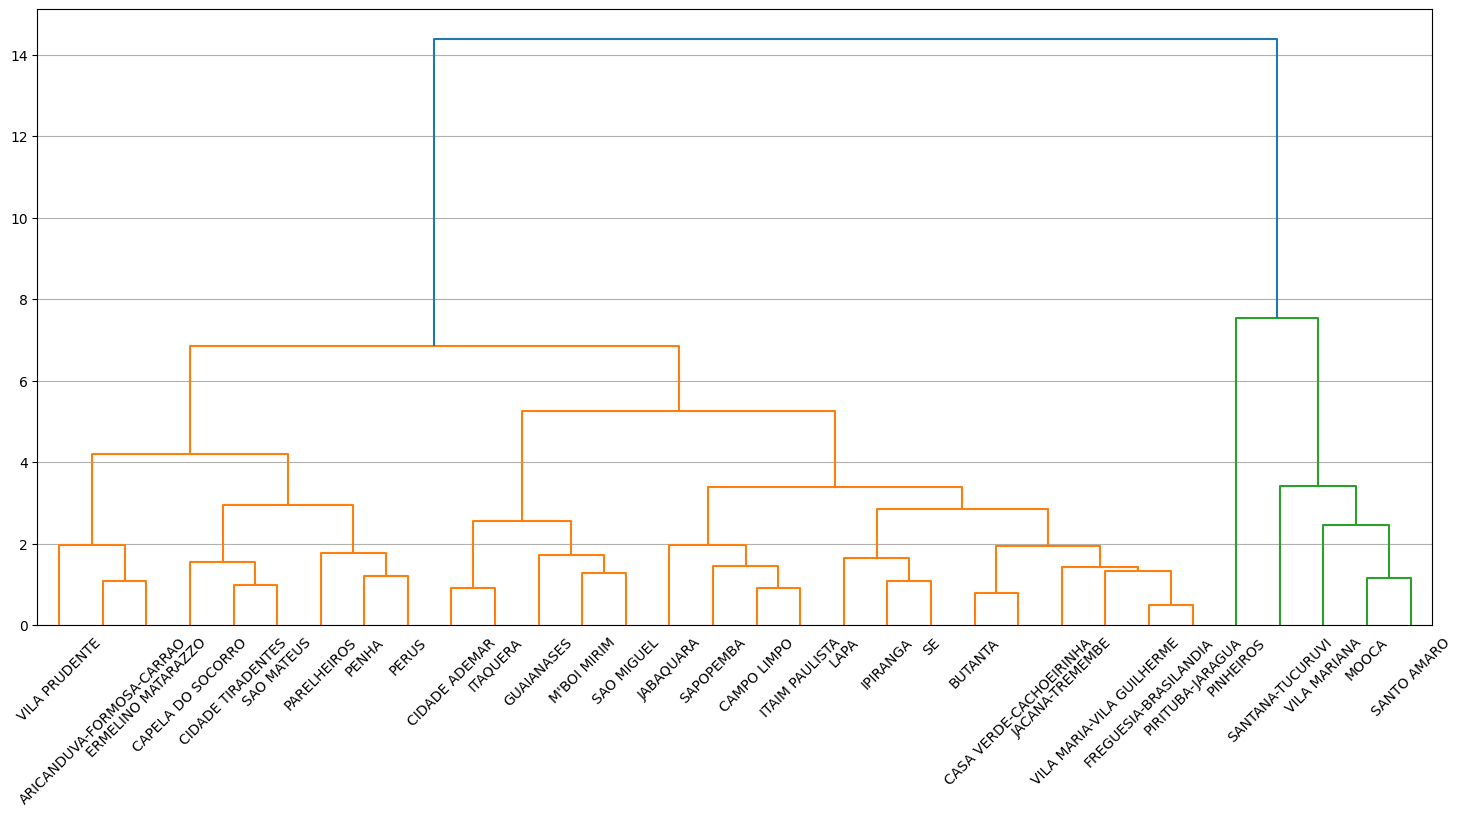

In [72]:
Z = hierarchy.linkage(df_scaled, 'ward')

plt.figure(figsize=(18, 8))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df_scaled.index), leaf_font_size=10)

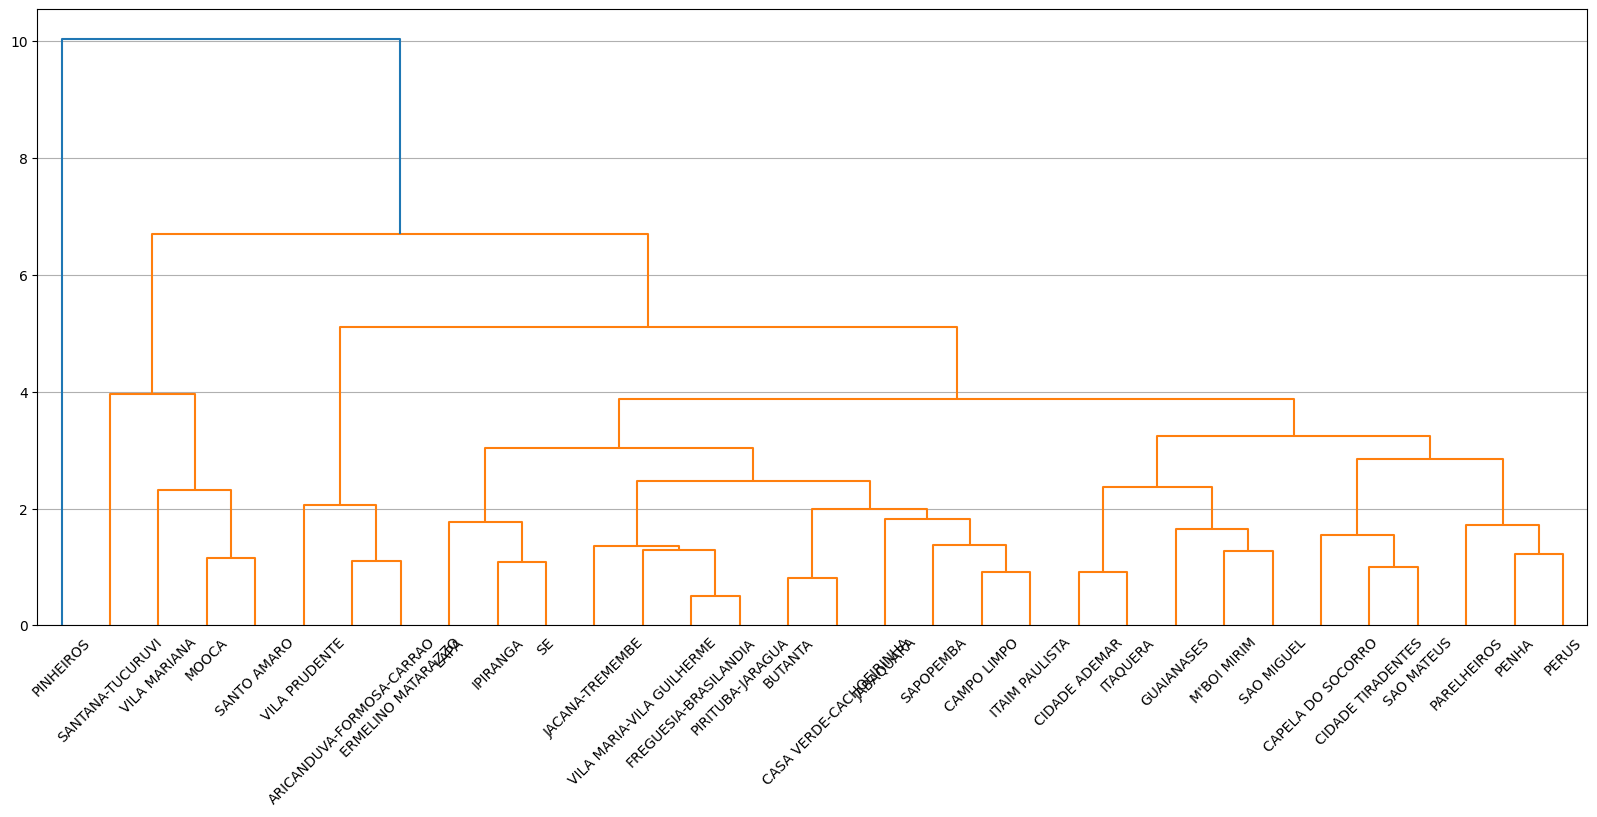

In [75]:
Z = hierarchy.linkage(df_scaled, 'complete')

plt.figure(figsize=(20, 8))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df_scaled.index), leaf_font_size=10)

Podemos observa que o método de ward tende a criar grupos mais balânceados.

In [68]:
!pip install geopandas

In [76]:
# Dados de distritos com informações para mapa coroplético

import geopandas as gpd
#dados = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/main/amostra_banco_distrito.csv', decimal=',')
#dados_agregados = dados.drop('Cliente', axis=1).groupby(by='Distrito').mean()

distritos = gpd.read_file('distritos-sp.geojson')
distritos.head(3)

,primaryind,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
0,1.0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"MULTIPOLYGON (((-46.71217 -23.45452, -46.71220..."
1,2.0,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"MULTIPOLYGON (((-46.76387 -23.47407, -46.76376..."
2,3.0,42,PIRITUBA-JARAGUA,02,JAR,JARAGUA,"MULTIPOLYGON (((-46.77026 -23.45337, -46.77025..."


Untilizando o agrupamento por dendograma temos:

<Axes: >

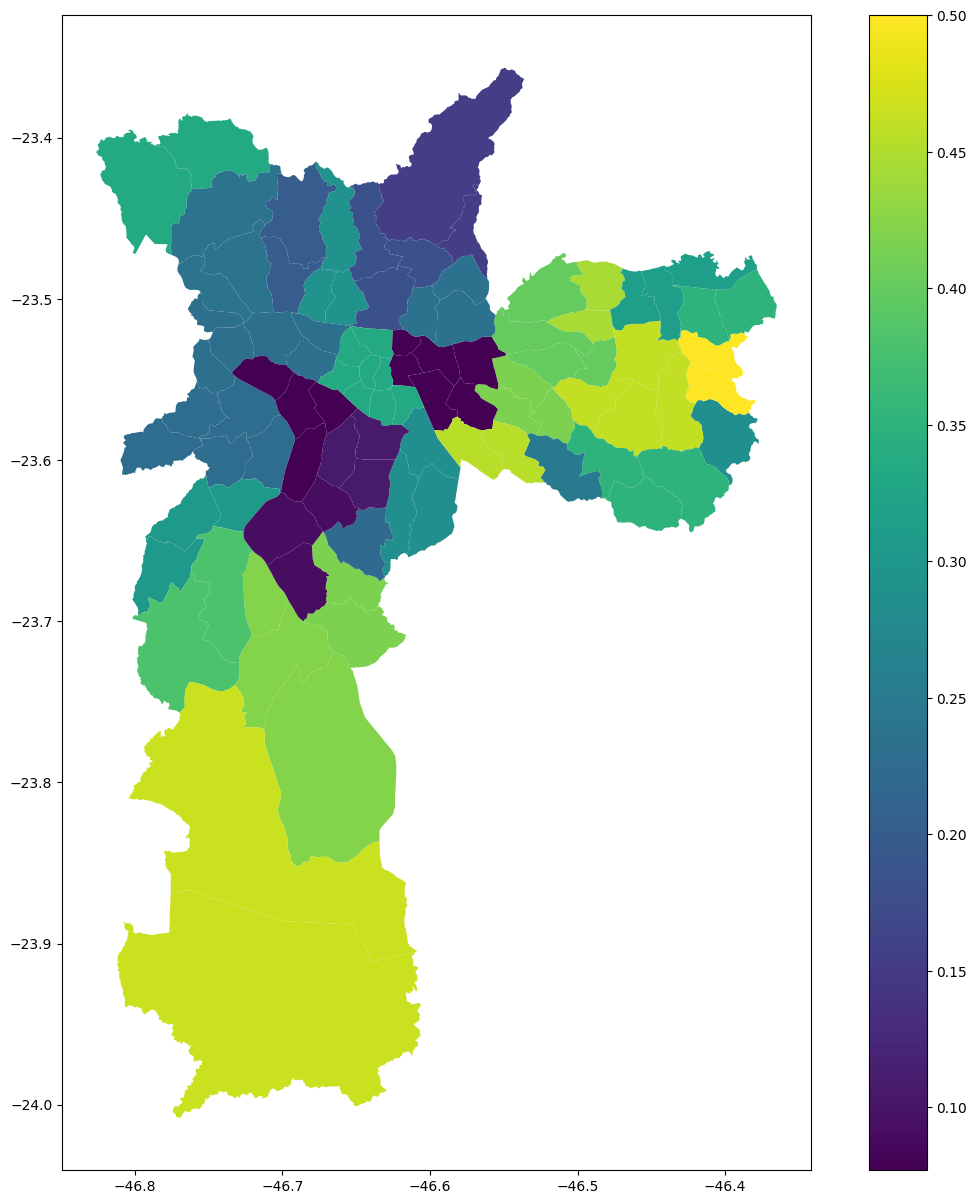

In [77]:
plt.rcParams["figure.figsize"] = [15, 15]

all_data = pd.merge(df_distritos, distritos, how='left', left_on='Distrito', right_on='ds_subpref')
all_data

gdf = gpd.GeoDataFrame(all_data, geometry='geometry')
gdf.plot(column='Inadimplente', legend=True, )

Agora iremos agrupar por K-médias em 4 grupos:

In [94]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [95]:
df_scaled['cluster']

Distrito
ARICANDUVA-FORMOSA-CARRAO    2
BUTANTA                      0
CAMPO LIMPO                  0
CAPELA DO SOCORRO            2
CASA VERDE-CACHOEIRINHA      0
CIDADE ADEMAR                0
CIDADE TIRADENTES            0
ERMELINO MATARAZZO           2
FREGUESIA-BRASILANDIA        0
GUAIANASES                   0
IPIRANGA                     0
ITAIM PAULISTA               0
ITAQUERA                     0
JABAQUARA                    0
JACANA-TREMEMBE              0
LAPA                         0
M'BOI MIRIM                  0
MOOCA                        1
PARELHEIROS                  2
PENHA                        0
PERUS                        0
PINHEIROS                    3
PIRITUBA-JARAGUA             0
SANTANA-TUCURUVI             1
SANTO AMARO                  1
SAO MATEUS                   2
SAO MIGUEL                   0
SAPOPEMBA                    0
SE                           0
VILA MARIA-VILA GUILHERME    0
VILA MARIANA                 1
VILA PRUDENTE                2

<Axes: >

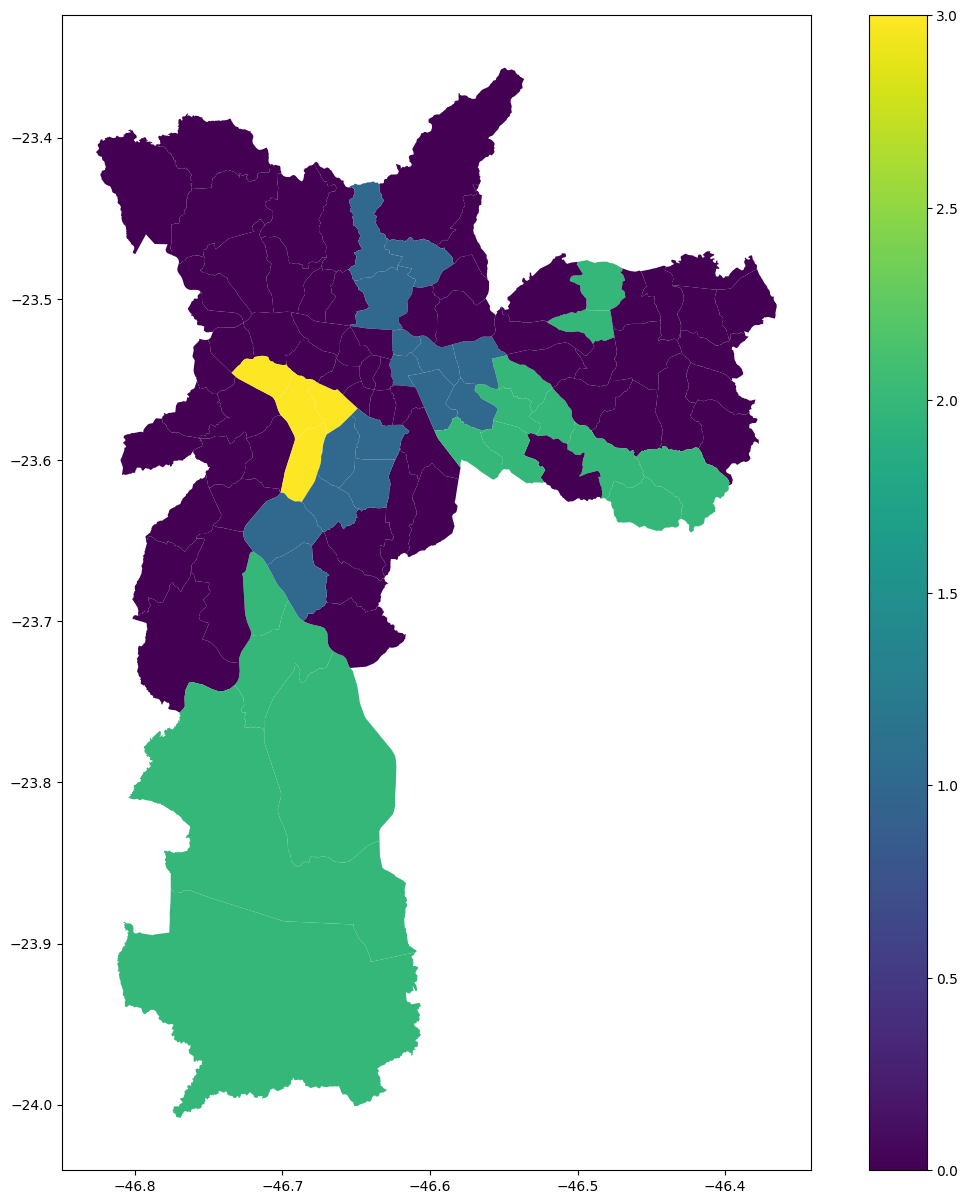

In [96]:
plt.rcParams["figure.figsize"] = [15, 15]

all_data = pd.merge(df_scaled, distritos, how='left', left_on='Distrito', right_on='ds_subpref')
all_data

gdf = gpd.GeoDataFrame(all_data, geometry='geometry')
gdf.plot(column='cluster', legend=True )

Nós podemos perceber que o K-médias por ter um valor pré-definido de grupos não nos permite ver a nuances que observamos no dendograma. Sendo uma boa aliar os dois agrupamentos.